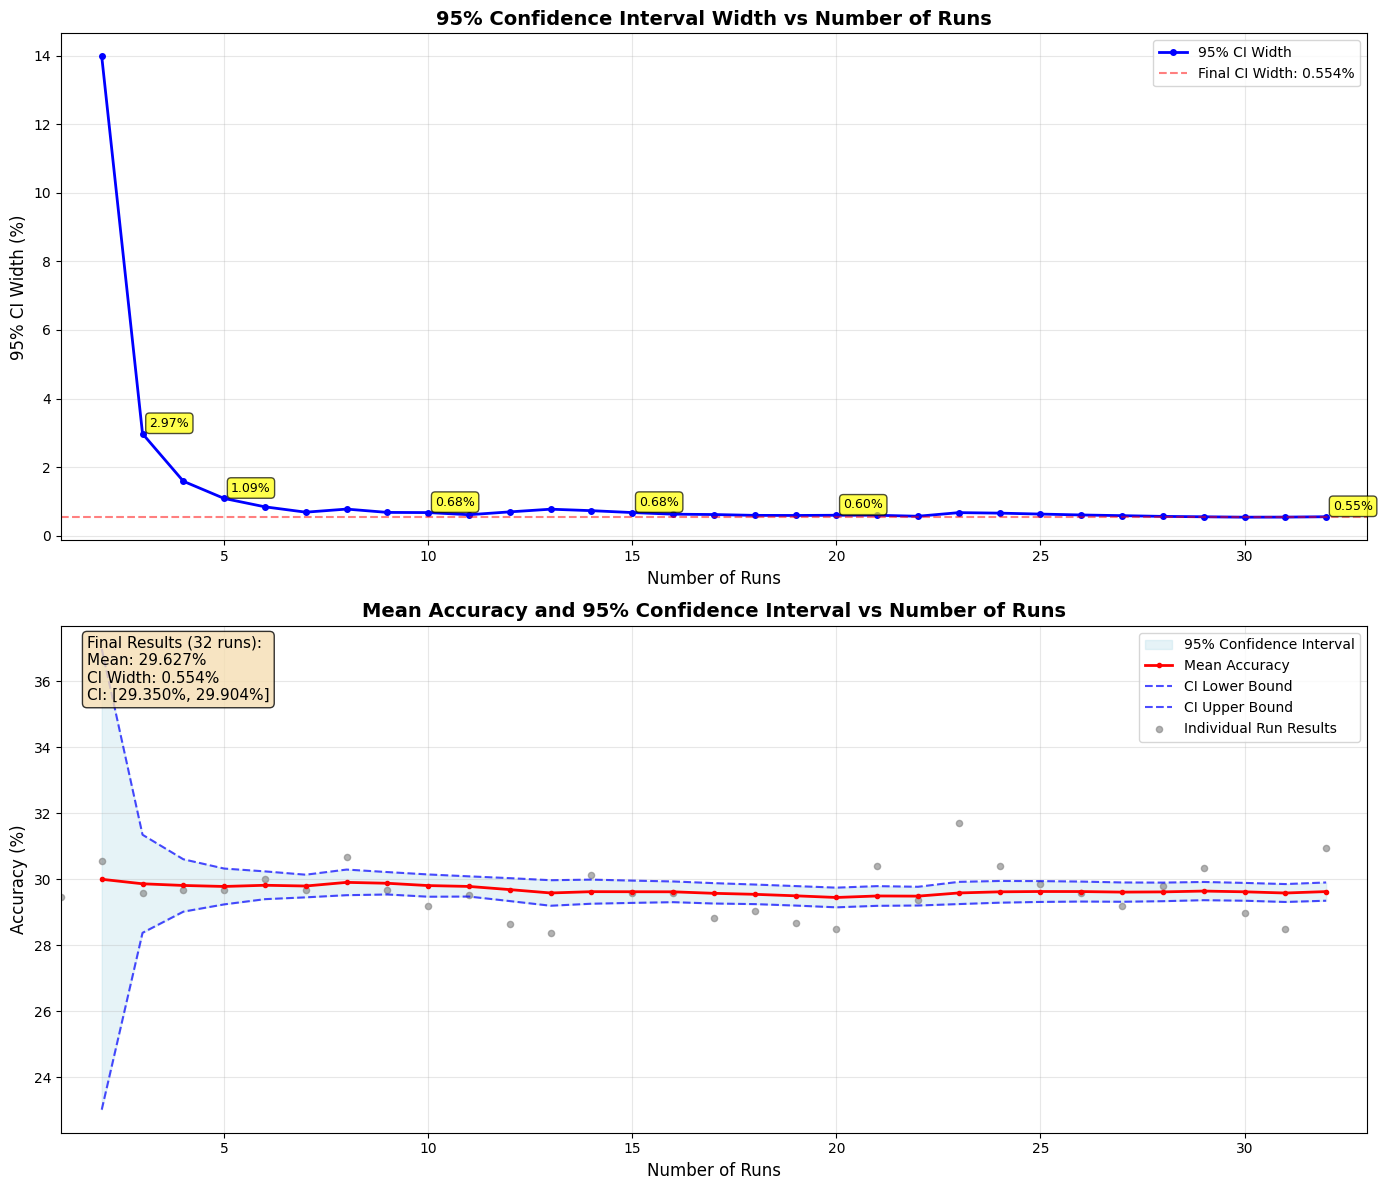

Summary Statistics:
Final mean accuracy: 29.6266%
Final 95% CI width: 0.5540%
Final 95% CI: [29.3496%, 29.9035%]

CI Width reduction from 3 to 32 runs: 2.975% → 0.554%
Improvement factor: 5.4x

CI Width Milestones:
   3 runs: 2.9749%
   5 runs: 1.0872%
  10 runs: 0.6754%
  15 runs: 0.6758%
  20 runs: 0.5973%
  25 runs: 0.6319%
  30 runs: 0.5411%
  32 runs: 0.5540%

Data Statistics:
Variance: 0.5902 (percentage points squared)
Standard Deviation: 0.7683 percentage points


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Accuracy data from all 32 runs (in percentages)
accuracies = [29.45, 30.55, 29.59, 29.66, 29.66, 30.00, 29.66, 30.68, 
              29.66, 29.18, 29.52, 28.63, 28.36, 30.14, 29.59, 29.59, 
              28.84, 29.03, 28.68, 28.49, 30.41, 29.38, 31.71, 30.41, 
              29.86, 29.59, 29.18, 29.79, 30.34, 28.97, 28.49, 30.96]

# Convert to proportions for calculations
acc_props = [acc/100 for acc in accuracies]

def calculate_ci_width(data, n_runs):
    """Calculate 95% CI width for first n_runs of data"""
    if n_runs < 2:
        return np.nan  # Can't calculate CI with less than 2 data points
    
    subset = data[:n_runs]
    mean = np.mean(subset)
    std = np.std(subset, ddof=1)  # Sample standard deviation
    
    # Get t-value for 95% CI
    t_val = stats.t.ppf(0.975, n_runs - 1)  # 97.5th percentile for 95% CI
    
    # Margin of error
    margin_of_error = t_val * std / np.sqrt(n_runs)
    
    # CI width is 2 * margin of error
    ci_width = 2 * margin_of_error
    
    return ci_width * 100  # Convert back to percentage

# Calculate CI widths for 2 to 32 runs (start at 2 since we need at least 2 for CI)
n_runs_range = list(range(2, 33))
ci_widths = [calculate_ci_width(acc_props, n) for n in n_runs_range]

# Also calculate means for the upper and lower bounds visualization
means = []
ci_lowers = []
ci_uppers = []

for n in n_runs_range:
    subset = acc_props[:n]
    mean = np.mean(subset)
    std = np.std(subset, ddof=1)
    t_val = stats.t.ppf(0.975, n - 1)
    margin_of_error = t_val * std / np.sqrt(n)
    
    means.append(mean * 100)
    ci_lowers.append((mean - margin_of_error) * 100)
    ci_uppers.append((mean + margin_of_error) * 100)

# Create the plot with better layout
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: CI Width vs Number of Runs
ax1.plot(n_runs_range, ci_widths, 'bo-', linewidth=2, markersize=4, label='95% CI Width')
ax1.set_xlabel('Number of Runs', fontsize=12)
ax1.set_ylabel('95% CI Width (%)', fontsize=12)
ax1.set_title('95% Confidence Interval Width vs Number of Runs', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, 33)

# Add annotations for key points
key_points = [(3, ci_widths[1]), (5, ci_widths[3]), (10, ci_widths[8]), 
              (15, ci_widths[13]), (20, ci_widths[18]), (32, ci_widths[-1])]
for x, y in key_points:
    ax1.annotate(f'{y:.2f}%', (x, y), xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9)

# Add horizontal line showing final CI width for reference
ax1.axhline(y=ci_widths[-1], color='red', linestyle='--', alpha=0.5, 
           label=f'Final CI Width: {ci_widths[-1]:.3f}%')

ax1.legend()

# Plot 2: Confidence Interval Bounds
ax2.fill_between(n_runs_range, ci_lowers, ci_uppers, alpha=0.3, color='lightblue', 
                 label='95% Confidence Interval')
ax2.plot(n_runs_range, means, 'ro-', linewidth=2, markersize=3, label='Mean Accuracy')
ax2.plot(n_runs_range, ci_lowers, 'b--', alpha=0.7, label='CI Lower Bound')
ax2.plot(n_runs_range, ci_uppers, 'b--', alpha=0.7, label='CI Upper Bound')

# Add individual data points for context
ax2.scatter(range(1, len(accuracies)+1), accuracies, alpha=0.6, s=20, 
           color='gray', label='Individual Run Results')

ax2.set_xlabel('Number of Runs', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Mean Accuracy and 95% Confidence Interval vs Number of Runs', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1, 33)
ax2.legend()

# Add final statistics as text
final_mean = means[-1]
final_width = ci_widths[-1]
stats_text = f'Final Results (32 runs):\nMean: {final_mean:.3f}%\nCI Width: {final_width:.3f}%\nCI: [{ci_lowers[-1]:.3f}%, {ci_uppers[-1]:.3f}%]'
ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Final mean accuracy: {final_mean:.4f}%")
print(f"Final 95% CI width: {final_width:.4f}%")
print(f"Final 95% CI: [{ci_lowers[-1]:.4f}%, {ci_uppers[-1]:.4f}%]")
print(f"\nCI Width reduction from 3 to 32 runs: {ci_widths[1]:.3f}% → {final_width:.3f}%")
print(f"Improvement factor: {ci_widths[1]/final_width:.1f}x")

# Print some milestone CI widths
print("\nCI Width Milestones:")
milestones = [3, 5, 10, 15, 20, 25, 30, 32]
for m in milestones:
    if m-2 < len(ci_widths):
        print(f"  {m:2d} runs: {ci_widths[m-2]:.4f}%")

# Calculate variance and standard deviation
variance = np.var(acc_props, ddof=1) * 10000  # Convert to percentage squared
std_dev = np.std(acc_props, ddof=1) * 100    # Convert to percentage
print(f"\nData Statistics:")
print(f"Variance: {variance:.4f} (percentage points squared)")
print(f"Standard Deviation: {std_dev:.4f} percentage points")

Loading data...
Dataset Overview:
Total questions: 1460
Overall accuracy: 30.14%
Languages: ['English' 'Hindi']
Subjects: ['Mathematics' 'Physics' 'Chemistry']
Question types: ['Numerical' 'MCQ-Single' 'MCQ-Multiple']
Years: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
=== MULTILINGUAL PERFORMANCE ANALYSIS ===

Performance by Language:
         is_correct             inference_time        
              count  sum   mean           mean     std
language                                              
English         730  241  0.330         24.323  16.491
Hindi           730  199  0.273         22.781  11.925

Question Distribution by Language:
language
English    730
Hindi      730
Name: count, dtype: int64

=== SUBJECT-LANGUAGE INTERACTION ===

Subject Performance by Language:
                      count   mean
subject     language              
Chemistry   English     246  0.301
            Hindi       246  0.236
Mathem

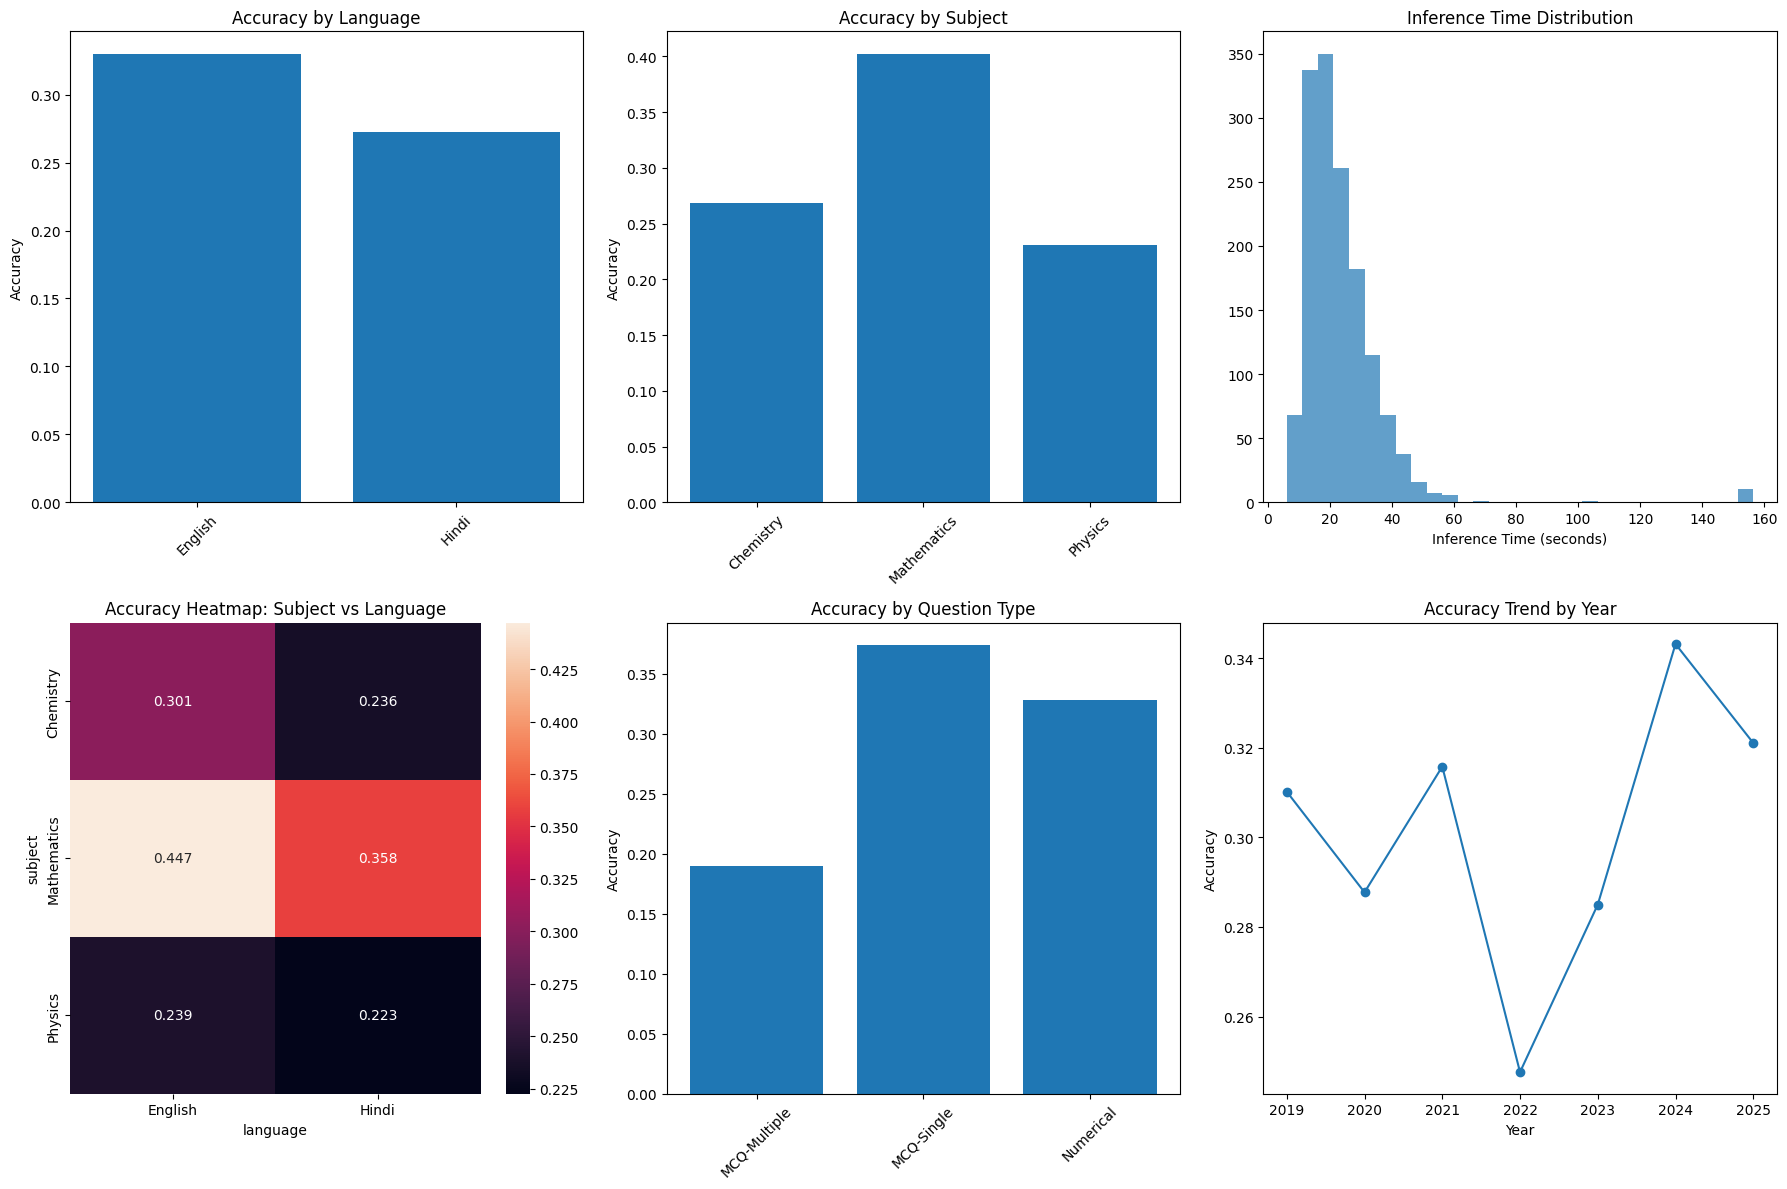

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Load and explore the data
def load_evaluation_data(file_path):
    """Load the JSON evaluation results"""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def create_results_dataframe(data):
    """Convert results to pandas DataFrame for easier analysis"""
    results_df = pd.DataFrame(data['results'])
    
    # Add overall metrics
    results_df['overall_accuracy'] = data['accuracy']
    results_df['total_questions'] = data['total_questions']
    results_df['avg_time_per_question'] = data['avg_time_per_question']
    
    return results_df

# 1. MULTILINGUAL PERFORMANCE ANALYSIS
def analyze_language_performance(df):
    """Analyze performance across different languages"""
    print("=== MULTILINGUAL PERFORMANCE ANALYSIS ===\n")
    
    # Overall accuracy by language
    lang_performance = df.groupby('language').agg({
        'is_correct': ['count', 'sum', 'mean'],
        'inference_time': ['mean', 'std']
    }).round(3)
    
    print("Performance by Language:")
    print(lang_performance)
    print()
    
    # Language distribution
    lang_dist = df['language'].value_counts()
    print("Question Distribution by Language:")
    print(lang_dist)
    print()
    
    return lang_performance

def analyze_subject_language_interaction(df):
    """Analyze how subjects perform across languages"""
    print("=== SUBJECT-LANGUAGE INTERACTION ===\n")
    
    # Cross-tabulation of subject and language performance
    subject_lang_perf = df.groupby(['subject', 'language'])['is_correct'].agg(['count', 'mean']).round(3)
    print("Subject Performance by Language:")
    print(subject_lang_perf)
    print()
    
    # Pivot table for better visualization
    pivot_accuracy = df.pivot_table(
        values='is_correct', 
        index='subject', 
        columns='language', 
        aggfunc='mean'
    ).round(3)
    
    print("Subject Accuracy Matrix (Language as columns):")
    print(pivot_accuracy)
    print()
    
    return pivot_accuracy

# 2. MULTIMODAL ANALYSIS
def analyze_multimodal_patterns(df):
    """Analyze patterns related to image presence and types"""
    print("=== MULTIMODAL ANALYSIS ===\n")
    
    # Check if images are present (assuming image_filename indicates multimodal questions)
    df['has_image'] = df['image_filename'].notna()
    
    # Performance with and without images
    image_performance = df.groupby('has_image')['is_correct'].agg(['count', 'mean']).round(3)
    print("Performance with/without Images:")
    print(image_performance)
    print()
    
    # Subject-wise multimodal performance
    subject_image_perf = df.groupby(['subject', 'has_image'])['is_correct'].mean().round(3)
    print("Subject Performance by Image Presence:")
    print(subject_image_perf)
    print()
    
    return image_performance

# 3. ERROR ANALYSIS
def analyze_error_patterns(df):
    """Analyze patterns in incorrect answers"""
    print("=== ERROR ANALYSIS ===\n")
    
    # Get incorrect answers
    incorrect_df = df[df['is_correct'] == False].copy()
    
    if len(incorrect_df) > 0:
        print(f"Total incorrect answers: {len(incorrect_df)}")
        
        # Error distribution by language
        error_by_lang = incorrect_df['language'].value_counts()
        print("\nErrors by Language:")
        print(error_by_lang)
        
        # Error distribution by subject
        error_by_subject = incorrect_df['subject'].value_counts()
        print("\nErrors by Subject:")
        print(error_by_subject)
        
        # Error distribution by question type
        error_by_type = incorrect_df['question_type'].value_counts()
        print("\nErrors by Question Type:")
        print(error_by_type)
        
        # Average inference time for correct vs incorrect
        time_comparison = df.groupby('is_correct')['inference_time'].mean().round(3)
        print("\nAverage Inference Time:")
        print(time_comparison)
        
    return incorrect_df

# 4. TEMPORAL AND DIFFICULTY ANALYSIS
def analyze_temporal_patterns(df):
    """Analyze patterns related to paper year and difficulty"""
    print("=== TEMPORAL AND DIFFICULTY ANALYSIS ===\n")
    
    # Performance by year
    year_performance = df.groupby('year')['is_correct'].agg(['count', 'mean']).round(3)
    print("Performance by Year:")
    print(year_performance)
    print()
    
    # Performance by paper (P1, P2, etc.)
    paper_performance = df.groupby('paper')['is_correct'].agg(['count', 'mean']).round(3)
    print("Performance by Paper:")
    print(paper_performance)
    print()
    
    return year_performance, paper_performance

# 5. COMPREHENSIVE VISUALIZATION FUNCTIONS
def create_performance_visualizations(df):
    """Create comprehensive visualizations"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Accuracy by Language
    lang_acc = df.groupby('language')['is_correct'].mean()
    axes[0, 0].bar(lang_acc.index, lang_acc.values)
    axes[0, 0].set_title('Accuracy by Language')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Accuracy by Subject
    subj_acc = df.groupby('subject')['is_correct'].mean()
    axes[0, 1].bar(subj_acc.index, subj_acc.values)
    axes[0, 1].set_title('Accuracy by Subject')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Inference Time Distribution
    axes[0, 2].hist(df['inference_time'], bins=30, alpha=0.7)
    axes[0, 2].set_title('Inference Time Distribution')
    axes[0, 2].set_xlabel('Inference Time (seconds)')
    
    # 4. Language vs Subject Heatmap
    pivot_acc = df.pivot_table(values='is_correct', index='subject', columns='language', aggfunc='mean')
    sns.heatmap(pivot_acc, annot=True, fmt='.3f', ax=axes[1, 0])
    axes[1, 0].set_title('Accuracy Heatmap: Subject vs Language')
    
    # 5. Question Type Performance
    type_acc = df.groupby('question_type')['is_correct'].mean()
    axes[1, 1].bar(type_acc.index, type_acc.values)
    axes[1, 1].set_title('Accuracy by Question Type')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # 6. Year Performance Trend
    year_acc = df.groupby('year')['is_correct'].mean()
    axes[1, 2].plot(year_acc.index, year_acc.values, marker='o')
    axes[1, 2].set_title('Accuracy Trend by Year')
    axes[1, 2].set_xlabel('Year')
    axes[1, 2].set_ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

# MAIN ANALYSIS FUNCTION
def run_comprehensive_analysis(file_path):
    """Run complete analysis pipeline"""
    print("Loading data...")
    data = load_evaluation_data(file_path)
    df = create_results_dataframe(data)
    
    print(f"Dataset Overview:")
    print(f"Total questions: {len(df)}")
    print(f"Overall accuracy: {data['accuracy']:.2f}%")
    print(f"Languages: {df['language'].unique()}")
    print(f"Subjects: {df['subject'].unique()}")
    print(f"Question types: {df['question_type'].unique()}")
    print(f"Years: {sorted(df['year'].unique())}")
    print("=" * 50)
    
    # Run all analyses
    lang_perf = analyze_language_performance(df)
    subj_lang_perf = analyze_subject_language_interaction(df)
    image_perf = analyze_multimodal_patterns(df)
    error_analysis = analyze_error_patterns(df)
    temporal_analysis = analyze_temporal_patterns(df)
    
    # Create visualizations
    create_performance_visualizations(df)
    
    return df, {
        'language_performance': lang_perf,
        'subject_language_performance': subj_lang_perf,
        'multimodal_performance': image_perf,
        'error_patterns': error_analysis,
        'temporal_patterns': temporal_analysis
    }

file_path = "gemma3_evaluation_results\gemma3_run_14_20250709_060048.json"
df, analysis_results = run_comprehensive_analysis(file_path)

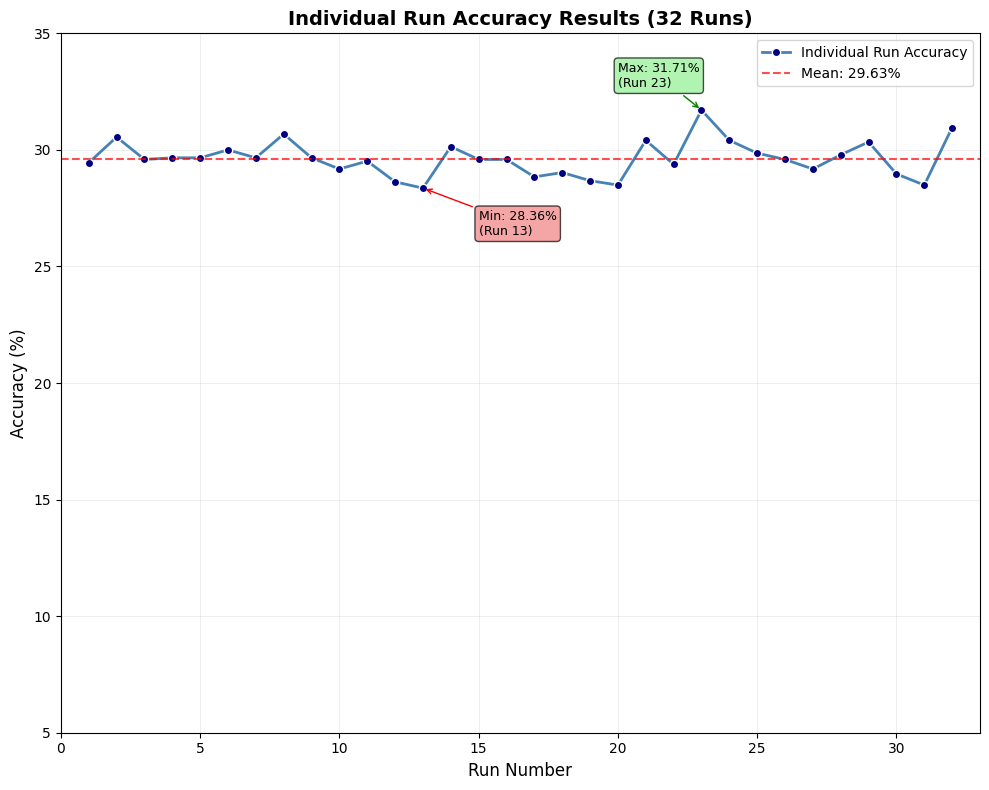

Accuracy Summary:
Mean: 29.6266%
Standard Deviation: 0.7683%
Min: 28.36% (Run 13)
Max: 31.71% (Run 23)
Range: 3.35%


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data from all 32 runs
accuracies = [29.45, 30.55, 29.59, 29.66, 29.66, 30.00, 29.66, 30.68, 
              29.66, 29.18, 29.52, 28.63, 28.36, 30.14, 29.59, 29.59, 
              28.84, 29.03, 28.68, 28.49, 30.41, 29.38, 31.71, 30.41, 
              29.86, 29.59, 29.18, 29.79, 30.34, 28.97, 28.49, 30.96]

# Run numbers (1 to 32)
run_numbers = list(range(1, len(accuracies) + 1))

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the line connecting individual accuracy points
plt.plot(run_numbers, accuracies, 'o-', linewidth=2, markersize=6, 
         color='steelblue', markerfacecolor='navy', markeredgecolor='white', 
         markeredgewidth=1, label='Individual Run Accuracy')

# Customize the plot
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Individual Run Accuracy Results (32 Runs)', fontsize=14, fontweight='bold')

# Set the y-axis scale from 0 to 35
plt.ylim(5, 35)
plt.xlim(0, 33)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Add horizontal reference lines
mean_accuracy = np.mean(accuracies)
plt.axhline(y=mean_accuracy, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean: {mean_accuracy:.2f}%')

# Add some statistical annotations
min_acc = min(accuracies)
max_acc = max(accuracies)
min_run = accuracies.index(min_acc) + 1
max_run = accuracies.index(max_acc) + 1

# Annotate min and max points
plt.annotate(f'Min: {min_acc}%\n(Run {min_run})', 
             xy=(min_run, min_acc), xytext=(min_run+2, min_acc-2),
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=9)

plt.annotate(f'Max: {max_acc}%\n(Run {max_run})', 
             xy=(max_run, max_acc), xytext=(max_run-3, max_acc+1),
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=9)

# Add legend
plt.legend(loc='upper right')

# Improve layout
plt.tight_layout()
plt.show()

# Print summary
print(f"Accuracy Summary:")
print(f"Mean: {mean_accuracy:.4f}%")
print(f"Standard Deviation: {np.std(accuracies, ddof=1):.4f}%")
print(f"Min: {min_acc}% (Run {min_run})")
print(f"Max: {max_acc}% (Run {max_run})")
print(f"Range: {max_acc - min_acc:.2f}%")